<a href="https://colab.research.google.com/github/Mia-Tay/collab_housing/blob/main/housing_analysis_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
folder= 'drive/My Drive/learning/'


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", False)

#Explotory Data Analysis


In [ ]:
data = pd.read_csv(folder +'housing_data.csv').copy()
data.head()

,Unnamed: 0,id,square-footage-min,square-footage-max,bedrooms,bathrooms,postal-code,unit-number,street-number,street-name,sold-price,style-name,lon,lat,area-code,Postal Code,hoods,hoodId,Hood#,Total Population,% of owner households spending 30% or more of household total income on shelter costs,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,minority_perc,South Asian%,Chinese%,Black%,west_asian%,latin_american%,unemployment%,no_college,owner%,renter%,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,0,10832129.0,none,none,4,4,M2R3S7,NaN,289,Hidden Trail,1510000.0,house-detached,-79.456561,43.781358,M2R,M2R,Newtonbrook West,36.0,36.0,23050.0,34.4,1135.0,66505.0,8620.0,50150.0,0.504555,0.035358,0.080043,0.018438,0.074187,0.009761,0.050976,0.095662,0.567285,0.432715,Newtonbrook West,483.0,98.0,737.0,557468.0,9091.0,2124.0
1,1,10831810.0,600,699,1,1,M6R1V5,601,36,Howard Park Ave,735888.0,condo-highrise,-79.449861,43.652121,M6R,M6R,High Park-Swansea,87.0,87.0,21750.0,26.4,1053.0,116465.0,9850.0,72286.0,0.157931,0.028046,0.033793,0.023678,0.002759,0.016322,0.040000,0.070805,0.606599,0.393401,High Park-Swansea,448.0,229.0,770.0,622206.0,6594.0,1680.0
2,2,10246007.0,none,none,4,6,M3H1Z6,NaN,77,Invermay Ave,2777000.0,house-detached,-79.441798,43.739834,M3H,M3H,Clanton Park,33.0,33.0,14610.0,24.7,938.0,89550.0,5535.0,61094.0,0.342916,0.025667,0.018823,0.037988,0.003080,0.014031,0.041752,0.127652,0.528455,0.471545,Clanton Park,357.0,130.0,740.0,605585.0,5011.0,734.0
3,3,10879683.0,1500,2000,4,3,M9L2C4,NaN,54,Duncanwoods Dr,945000.0,house-semidetached,-79.559905,43.750705,M9L,M9L,Humber Summit,21.0,21.0,12530.0,29.2,907.0,65757.0,3790.0,57786.0,0.585794,0.317638,0.005188,0.095371,0.026736,0.044294,0.051476,0.298883,0.724274,0.275726,Humber Summit,1373.0,53.0,715.0,354381.0,17950.0,1659.0
4,4,10871687.0,600,699,1,1,M5V4A2,809,215,Fort York Blvd,611000.0,condo-highrise,-79.404535,43.636346,M5V,M5V,Waterfront Communities-The Island,77.0,77.0,43365.0,37.2,1417.0,95004.0,26990.0,69107.0,0.402283,0.086014,0.117030,0.050847,0.020062,0.020869,0.038626,0.037588,0.494628,0.505372,Waterfront Communities-The Island,2899.0,130.0,748.0,416759.0,88058.0,2864.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'square-footage-min', 'square-footage-max',
       'bedrooms', 'bathrooms', 'postal-code', 'unit-number', 'street-number',
       'street-name', 'sold-price', 'style-name', 'lon', 'lat', 'area-code',
       'Postal Code', 'hoods', 'hoodId', 'Hood#', 'Total Population',
       '% of owner households spending 30% or more of household total income on shelter costs',
       'Average monthly shelter costs for rented dwellings ($)',
       'Average after-tax family income $ (Family income in 2010 of economic families)',
       'Household income in 2010 of private households',
       'Median household total income $', 'minority_perc', 'South Asian%',
       'Chinese%', 'Black%', 'west_asian%', 'latin_american%', 'unemployment%',
       'no_college', 'owner%', 'renter%', 'Neighbourhood', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Home Prices',
       'Local Employment', 'Social Assistance Recipients'],
      dtype='object')

In [ ]:
data = data[data['style-name']!='vacant-land']

In [ ]:
data['style-name'].value_counts()

condo-highrise        468
house-detached        392
house-semidetached    136
townhouse             110
condo-lowrise          52
house-attached         49
condo-other             8
Name: style-name, dtype: int64

In [ ]:
data_condo = data[data['style-name']=='condo'].copy()

In [ ]:
data_condo[data_condo['unit-number'].map(len)>4]

,Unnamed: 0,id,square-footage-min,square-footage-max,bedrooms,bathrooms,postal-code,unit-number,street-number,street-name,sold-price,style-name,lon,lat,area-code,Postal Code,hoods,hoodId,Hood#,Total Population,% of owner households spending 30% or more of household total income on shelter costs,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,minority_perc,South Asian%,Chinese%,Black%,west_asian%,latin_american%,unemployment%,no_college,owner%,renter%,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients


In [ ]:
#listings that with unit number that only got 1 or 2 digit. put 5 to replace it as there are only two listings
#listings that contains ph or other character
#listings that contain 'lower'
#listing with bad format like '621 e'
data_condo['floor#'] = data_condo['unit-number'].apply(lambda x:'ph' if 'ph' in x else x[0:-2])
data_condo.head()


,Unnamed: 0,id,square-footage-min,square-footage-max,bedrooms,bathrooms,postal-code,unit-number,street-number,street-name,sold-price,style-name,lon,lat,area-code,Postal Code,hoods,hoodId,Hood#,Total Population,% of owner households spending 30% or more of household total income on shelter costs,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,minority_perc,South Asian%,Chinese%,Black%,west_asian%,latin_american%,unemployment%,no_college,owner%,renter%,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,floor#


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'square-footage-min', 'square-footage-max',
       'bedrooms', 'bathrooms', 'postal-code', 'unit-number', 'street-number',
       'street-name', 'sold-price', 'style-name', 'lon', 'lat', 'area-code',
       'Postal Code', 'hoods', 'hoodId', 'Hood#', 'Total Population',
       '% of owner households spending 30% or more of household total income on shelter costs',
       'Average monthly shelter costs for rented dwellings ($)',
       'Average after-tax family income $ (Family income in 2010 of economic families)',
       'Household income in 2010 of private households',
       'Median household total income $', 'minority_perc', 'South Asian%',
       'Chinese%', 'Black%', 'west_asian%', 'latin_american%', 'unemployment%',
       'no_college', 'owner%', 'renter%', 'Neighbourhood', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Home Prices',
       'Local Employment', 'Social Assistance Recipients'],
      dtype='object')

In [ ]:
#create df_housing, only keep wanted features
df_housing = data[['id', 'area-code','bedrooms',
       'bathrooms', 'sold-price', 'style-name',
       'lon', 'lat', 'Total Population',
       '% of owner households spending 30% or more of household total income on shelter costs',
       'Average after-tax family income $ (Family income in 2010 of economic families)',
       'Median household total income $', 'minority_perc','unemployment%',
       'no_college', 'owner%', 'Businesses', 'Child Care Spaces',
       'Home Prices', 'Social Assistance Recipients']].copy()

In [ ]:
#rename long column names
df_housing.rename(columns={'% of owner households spending 30% or more of household total income on shelter costs':'% of unaffordable shelter cost', 'Average after-tax family income $ (Family income in 2010 of economic families)':'after-tax family income'}, inplace= True)

In [ ]:
df_housing.head()

,id,area-code,bedrooms,bathrooms,sold-price,style-name,lon,lat,Total Population,% of unaffordable shelter cost,after-tax family income,Median household total income $,minority_perc,unemployment%,no_college,owner%,Businesses,Child Care Spaces,Home Prices,Social Assistance Recipients
0,10832129.0,M2R,4,4,1510000.0,house-detached,-79.456561,43.781358,23050.0,34.4,66505.0,50150.0,0.504555,0.050976,0.095662,0.567285,483.0,98.0,557468.0,2124.0
1,10831810.0,M6R,1,1,735888.0,condo-highrise,-79.449861,43.652121,21750.0,26.4,116465.0,72286.0,0.157931,0.040000,0.070805,0.606599,448.0,229.0,622206.0,1680.0
2,10246007.0,M3H,4,6,2777000.0,house-detached,-79.441798,43.739834,14610.0,24.7,89550.0,61094.0,0.342916,0.041752,0.127652,0.528455,357.0,130.0,605585.0,734.0
3,10879683.0,M9L,4,3,945000.0,house-semidetached,-79.559905,43.750705,12530.0,29.2,65757.0,57786.0,0.585794,0.051476,0.298883,0.724274,1373.0,53.0,354381.0,1659.0
4,10871687.0,M5V,1,1,611000.0,condo-highrise,-79.404535,43.636346,43365.0,37.2,95004.0,69107.0,0.402283,0.038626,0.037588,0.494628,2899.0,130.0,416759.0,2864.0


In [ ]:
#find out median sold price based on area
median_prices = df_housing.groupby(['area-code'])['sold-price'].median().reset_index()
median_prices.columns=['area-code', 'median-price']


In [ ]:
housing = df_housing.merge(median_prices, how='left', on='area-code')
housing.head()

,id,area-code,bedrooms,bathrooms,sold-price,style-name,lon,lat,Total Population,% of unaffordable shelter cost,after-tax family income,Median household total income $,minority_perc,unemployment%,no_college,owner%,Businesses,Child Care Spaces,Home Prices,Social Assistance Recipients,median-price
0,10832129.0,M2R,4,4,1510000.0,house-detached,-79.456561,43.781358,23050.0,34.4,66505.0,50150.0,0.504555,0.050976,0.095662,0.567285,483.0,98.0,557468.0,2124.0,1445000.0
1,10831810.0,M6R,1,1,735888.0,condo-highrise,-79.449861,43.652121,21750.0,26.4,116465.0,72286.0,0.157931,0.040000,0.070805,0.606599,448.0,229.0,622206.0,1680.0,1855000.0
2,10246007.0,M3H,4,6,2777000.0,house-detached,-79.441798,43.739834,14610.0,24.7,89550.0,61094.0,0.342916,0.041752,0.127652,0.528455,357.0,130.0,605585.0,734.0,1400000.0
3,10879683.0,M9L,4,3,945000.0,house-semidetached,-79.559905,43.750705,12530.0,29.2,65757.0,57786.0,0.585794,0.051476,0.298883,0.724274,1373.0,53.0,354381.0,1659.0,952500.0
4,10871687.0,M5V,1,1,611000.0,condo-highrise,-79.404535,43.636346,43365.0,37.2,95004.0,69107.0,0.402283,0.038626,0.037588,0.494628,2899.0,130.0,416759.0,2864.0,672000.0


In [ ]:
#check info again before building models or processing
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1215 non-null   float64
 1   area-code                        1215 non-null   object 
 2   bedrooms                         1215 non-null   int64  
 3   bathrooms                        1215 non-null   int64  
 4   sold-price                       1215 non-null   float64
 5   style-name                       1215 non-null   object 
 6   lon                              1215 non-null   float64
 7   lat                              1215 non-null   float64
 8   Total Population                 1203 non-null   float64
 9   % of unaffordable shelter cost   1203 non-null   float64
 10  after-tax family income          1203 non-null   float64
 11  Median household total income $  1203 non-null   float64
 12  minority_perc       

Text(0.5, 1.0, 'Correlation Heatmap')

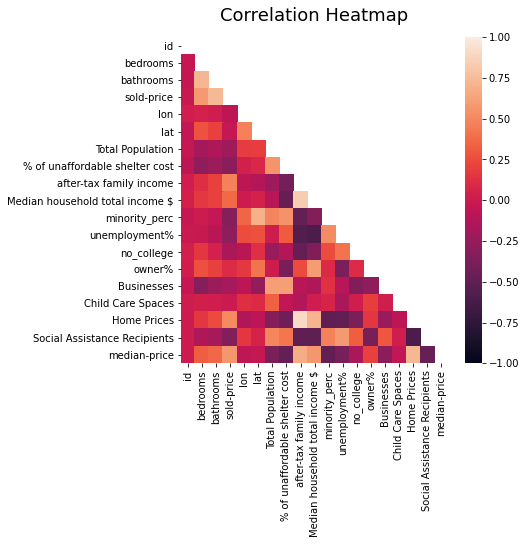

In [ ]:
#create correlation heatmap
import seaborn as sns
from matplotlib import pyplot as plt
mask = np.triu(np.ones_like(housing.corr(), dtype=np.bool))

plt.figure(figsize=(6,6))

heatmap = sns.heatmap(housing.corr(), mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


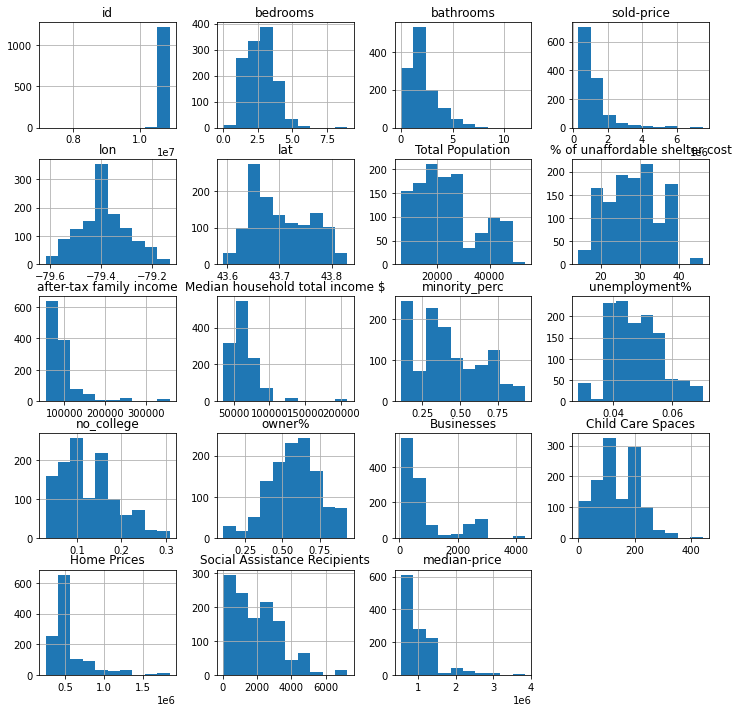

In [ ]:
housing.hist(figsize=(12,12))
plt.show()

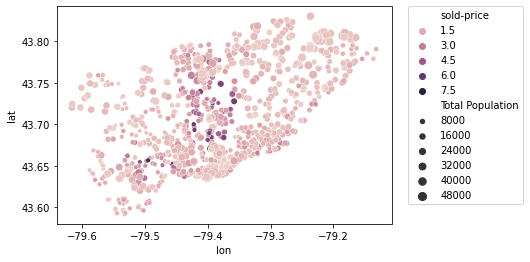

In [ ]:
sns.scatterplot(x='lon', y='lat', data=housing, hue='sold-price', size='Total Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#check correlation
#standard correlation coefficient (also called Pearson’s r) between every pair of attributes
housing_test = housing.drop(columns=['Home Prices','after-tax family income', 'id', 'lat', 'lon'])
corr_matrix = housing_test.corr()
corr_matrix["sold-price"].sort_values(ascending=False)

sold-price                         1.000000
bathrooms                          0.741890
bedrooms                           0.585015
median-price                       0.572213
Median household total income $    0.372572
owner%                             0.105310
Child Care Spaces                 -0.001691
no_college                        -0.164055
Businesses                        -0.179256
Total Population                  -0.218556
unemployment%                     -0.285283
% of unaffordable shelter cost    -0.310117
minority_perc                     -0.323125
Social Assistance Recipients      -0.336451
Name: sold-price, dtype: float64

In [ ]:
# too large to run, comment out for official
# attributes = ['median-price', 'Median household total income $','bathrooms', 'bedrooms']
# sns.pairplot(housing_test[attributes])
# plt.show()

note from the book: The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

In [ ]:
# too large to run, comment out for official
# too large to run, comment out for official
# sns.pairplot(housing_test)
# plt.show()

#Data cleaning


*   machine learning algorithm doesn't work with missing data well
*   List item



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1215 non-null   float64
 1   area-code                        1215 non-null   object 
 2   bedrooms                         1215 non-null   int64  
 3   bathrooms                        1215 non-null   int64  
 4   sold-price                       1215 non-null   float64
 5   style-name                       1215 non-null   object 
 6   lon                              1215 non-null   float64
 7   lat                              1215 non-null   float64
 8   Total Population                 1203 non-null   float64
 9   % of unaffordable shelter cost   1203 non-null   float64
 10  after-tax family income          1203 non-null   float64
 11  Median household total income $  1203 non-null   float64
 12  minority_perc       

Seperate Train Test data, making sure test data with similar distrubution of income


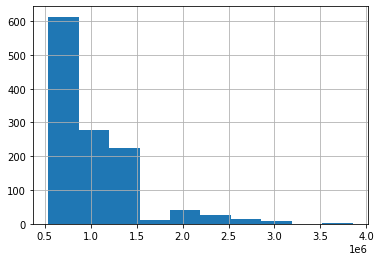

In [ ]:
housing['median-price'].hist()

In [ ]:
housing['median-price'].value_counts(sort=True)

672000.0     72
1400000.0    49
753150.0     48
720400.0     42
765000.0     37
1100000.0    36
840000.0     29
790000.0     29
1200000.0    28
722500.0     26
825000.0     25
1388000.0    25
950000.0     22
679000.0     22
1187500.0    20
720000.0     19
1050000.0    19
822500.0     18
641000.0     17
1445000.0    16
1325000.0    16
998944.0     16
681500.0     16
633500.0     16
867500.0     16
980000.0     15
2090000.0    14
650000.0     14
851250.0     14
1517500.0    14
708750.0     14
1505000.0    14
1167500.0    14
2495000.0    13
775000.0     13
1030000.0    13
2553000.0    13
2150000.0    13
1250000.0    13
830000.0     12
1262500.0    12
1376500.0    12
1290000.0    12
1226500.0    12
756000.0     11
617000.0     11
1170000.0    11
1855000.0    11
689000.0     11
987500.0     10
752500.0     10
1063000.0    10
726500.0     10
900000.0      9
570000.0      9
951000.0      9
925000.0      9
3150000.0     8
545000.0      8
1070000.0     8
891000.0      7
540000.0      7
1515000.

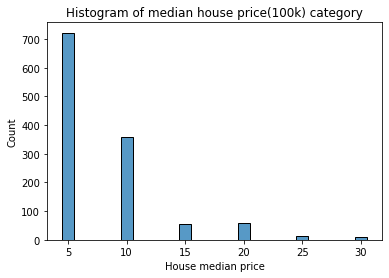

In [ ]:
mbins=[0,500000,1000000,1500000,2000000, 2500000, 3000000]

housing['price_cat'] = pd.cut(housing['median-price'],
                               bins=mbins+[np.inf],
                               labels=[x / 100000 for x in mbins])
#labels =[0,6,7.5,9,12,16,25]
sns.histplot(housing['price_cat'])
plt.xlabel('House median price')
plt.title('Histogram of median house price(100k) category')
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

model_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
check_split= model_split.split(housing, housing['price_cat'])
for train_index, test_index in model_split.split(housing, housing['price_cat']):

  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
 

In [ ]:
housing.drop(columns=['price_cat'], inplace=True)
strat_train_set.drop(columns=['price_cat'], inplace=True)
strat_test_set.drop(columns=['price_cat'], inplace=True)

In [ ]:
strat_train_set.head()

,id,area-code,bedrooms,bathrooms,sold-price,style-name,lon,lat,Total Population,% of unaffordable shelter cost,after-tax family income,Median household total income $,minority_perc,unemployment%,no_college,owner%,Businesses,Child Care Spaces,Home Prices,Social Assistance Recipients,median-price
698,10832136.0,M6S,3,4,3133333.33,house-detached,-79.498004,43.655737,9635.0,18.7,114798.0,91230.0,0.185781,0.039440,0.096523,0.772966,334.0,220.0,666204.0,251.0,1400000.0
410,10859947.0,M6P,3,2,1300000.00,condo-highrise,-79.468191,43.655327,14015.0,29.7,78000.0,60789.0,0.286122,0.049590,0.135926,0.590435,631.0,30.0,532997.0,1155.0,1226500.0
131,10837840.0,M4M,2,1,1100000.00,house-attached,-79.345082,43.664320,25640.0,27.3,83795.0,65076.0,0.444228,0.041342,0.168682,0.617784,1197.0,224.0,537087.0,2695.0,1050000.0
463,10842481.0,M8Z,4,4,2333172.00,house-detached,-79.510875,43.629110,38070.0,26.4,87747.0,66537.0,0.324534,0.041108,0.107171,0.612804,2263.0,204.0,491678.0,2534.0,1250000.0
125,10840975.0,M4V,3,5,5900000.00,house-detached,-79.393584,43.683991,11655.0,18.7,173751.0,71728.0,0.143715,0.045474,0.029172,0.386883,468.0,20.0,995616.0,283.0,2090000.0


In [ ]:
housing_predictors = strat_train_set.drop(columns=['sold-price'])
housing_label = strat_train_set['sold-price'].copy()

To use simple imputer, seperate dataframe housing into num and category parts. 

In [ ]:
#numeric data set housing_num
housing_num = housing_predictors.drop(columns=['id', 'area-code','style-name'])
#categorary data set  housing_cat
housing_cat = housing_predictors[['style-name']]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['style-name']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_predictors) #return array


In [ ]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# as column_style_name is a list,like list[array1] so need to take out array1 from inside
#Then transform array1 to list
array1 = cat_encoder.categories_[0]
encoder_column_names = array1.tolist()
encoder_column_names

['condo-highrise',
 'condo-lowrise',
 'condo-other',
 'house-attached',
 'house-detached',
 'house-semidetached',
 'townhouse']

In [ ]:
#combine original column names and encoded columns names, get features
features = list(housing_num.columns)+ encoder_column_names
len(features)


24

Select and Train a Model

In [ ]:
X = housing_prepared
y = housing_label


In [ ]:
X.shape

(972, 24)

Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X)

#cross validation get negative mean squared error
lin_scores = cross_val_score(lin_reg,X,y, scoring='neg_mean_squared_error', cv=10)
lin_scores_root = np.sqrt(-lin_scores)
lin_mse_mean = lin_scores_root.mean()
lin_mse_std = np.sqrt(lin_scores_root).std()
print('Linear regression')
print(f'Root_mean_squared-error {lin_mse_mean} with std of {lin_mse_std}')
#cross validation get negative mean absolute error
lin_mae_cv_score = cross_val_score(lin_reg,X,y, scoring='neg_mean_absolute_error', cv=10)
lin_mae_mean = (-lin_mae_cv_score).mean()
lin_mae_std = (-lin_mae_cv_score).std()
print(f'mean_absolte_error {lin_mae_mean} with std of {lin_mae_std}')

#cv get r2 score
lin_r2_score = cross_val_score(lin_reg,X,y, scoring='r2', cv=10)
lin_r2_mean=lin_r2_score.mean()
lin_r2_std = lin_r2_score.std()
print(f'R2 score is {lin_r2_mean} with std of {lin_r2_std}')



Linear regression
Root_mean_squared-error 447168.6820143734 with std of 59.78240842757854
mean_absolte_error 281217.5825645789 with std of 32869.76192205745
R2 score is 0.7031423512476958 with std of 0.0677644445248991


[  54623.10350242  450032.12925094    8436.35074385 -143114.29882233
   47593.09218496   10536.92434692  144711.34261554  -44986.5272122
   58553.00017168  -13928.1443317   -49365.69923357 -100576.60667572
   -8403.97548623   25421.9900436    62901.95617195  -76940.85547314
  135839.25786747  -77736.1882955   -17456.86545177 -199694.80800038
   12351.81342995  344560.73328024   60143.39928994 -122168.08425248]


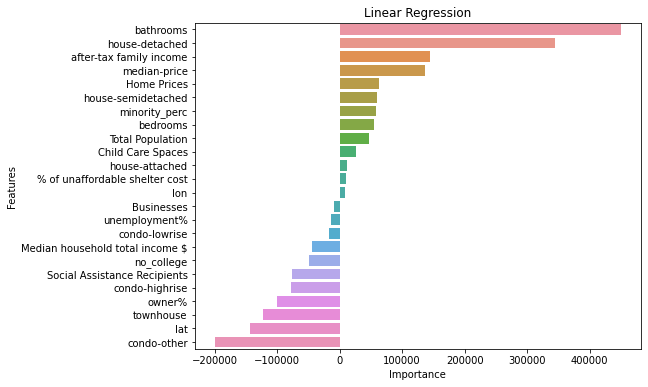

In [ ]:
#linear regression feature importance
importance = lin_reg.coef_
#summarize feat ure importance
print(importance)
features_linear = pd.DataFrame({'Features': features, 'Importance': importance})
features_linear.sort_values(by="Importance", axis=0, ascending=False, inplace=True)
plt.figure(figsize=[8,6])
sns.barplot(y="Features",x="Importance",data=features_linear, orient='h')
# features_linear.plot(
#     x="Features",
#     y="Importance",
#     kind="bar",
#     figsize=(8, 8),
#     title="Feature Importance",
#     logy=True,
# )
plt.title('Linear Regression')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X, y)

#cv get negative mean squared error
forest_scores = cross_val_score(forest_reg,X,y, scoring='neg_mean_squared_error', cv=10)
forest_scores_root = np.sqrt(-forest_scores)
forest_mse_mean = forest_scores_root.mean()
forest_mse_std = np.sqrt(forest_scores_root).std()
print('Random Forest')
print(f'Root_mean_squared-error {forest_mse_mean} with std of {forest_mse_std}')

#cv get r2 score
forest_r2_score = cross_val_score(forest_reg,X,y, scoring='r2', cv=10)
forest_r2_mean=forest_r2_score.mean()
forest_r2_std = forest_r2_score.std()
print(f'R2 score is {forest_r2_mean} with std of {forest_r2_std}')

Random Forest
Root_mean_squared-error 393289.6420252363 with std of 54.4281779206125
R2 score is 0.7633769649828375 with std of 0.08075336264909565


[2.88909769e-02 4.89170735e-01 2.83915884e-02 3.64507545e-02
 9.72850306e-03 4.95455680e-03 1.50237041e-01 6.58147136e-03
 8.36495240e-03 4.88919864e-03 4.07707193e-02 9.30119407e-03
 5.55900082e-03 9.03372157e-03 3.56654158e-02 7.59527558e-03
 5.85342723e-02 5.11106918e-03 9.50342241e-04 9.04420372e-06
 9.41696031e-04 5.29465608e-02 3.31576874e-03 2.60614122e-03]


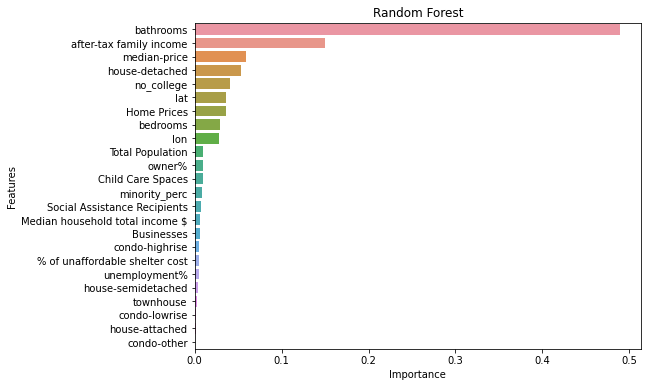

In [ ]:
#Random Forest regression feature importance
importance_forest = forest_reg.feature_importances_
#summarize feat ure importance
print(importance_forest)
features_forest = pd.DataFrame({'Features': features, 'Importance': forest_reg.feature_importances_})
features_forest.sort_values(by="Importance", axis=0, ascending=False, inplace=True)
plt.figure(figsize=[8,6])
sns.barplot(y="Features",x="Importance",data=features_forest, orient='h')
plt.title('Random Forest')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X,y)

#cv get negative mean squared error
tree_scores = cross_val_score(tree_reg,X,y, scoring='neg_mean_squared_error', cv=10)
tree_scores_root = np.sqrt(-tree_scores)
tree_mse_mean = tree_scores_root.mean()
tree_mse_std = np.sqrt(tree_scores_root).std()
print('Decision Tree')
print(f'Root_mean_squared-error {tree_mse_mean} with std of {tree_mse_std}')

#cv get r2 score
tree_r2_score = cross_val_score(tree_reg,X,y, scoring='r2', cv=10)
tree_r2_mean=tree_r2_score.mean()
tree_r2_std = tree_r2_score.std()
print(f'R2 score is {tree_r2_mean} with std of {tree_r2_std}')


Decision Tree
Root_mean_squared-error 511281.97202392714 with std of 64.04473047689198
R2 score is 0.5970999169488922 with std of 0.1471795410679777


SVR


In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(X,y)

#cv get negative mean squared error
svm_scores = cross_val_score(svm_reg,X,y, scoring='neg_mean_squared_error', cv=10)
svm_scores_root = np.sqrt(-svm_scores)
svm_mse_mean = svm_scores_root.mean()
svm_mse_std = np.sqrt(svm_scores_root).std()
print('SVM')
print(f'Root_mean_squared-error {svm_mse_mean} with std of {svm_mse_std}')

#cv get r2 score
svm_r2_score = cross_val_score(svm_reg,X,y, scoring='r2', cv=10)
svm_r2_mean=svm_r2_score.mean()
svm_r2_std = svm_r2_score.std()
print(f'R2 score is {svm_r2_mean} with std of {svm_r2_std}')


SVM
Root_mean_squared-error 863966.7199123831 with std of 85.86567217698808
R2 score is -0.07571360689641678 with std of 0.031507947472741056


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor()
neigh_reg.fit(X, y)

#cv get negative mean squared error
neigh_scores = cross_val_score(neigh_reg,X,y, scoring='neg_mean_squared_error', cv=10)
neigh_scores_root = np.sqrt(-svm_scores)
neigh_rmse_mean = neigh_scores_root.mean()
neigh_rmse_std = np.sqrt(neigh_scores_root).std()
print('KNN')
print(f'Root_mean_squared-error {neigh_rmse_mean} with std of {neigh_rmse_std}')

#CV get r2
neigh_r2_score = cross_val_score(neigh_reg,X,y, scoring='r2', cv=10)
neigh_r2_mean=neigh_r2_score.mean()
neigh_r2_std = neigh_r2_score.std()
print(f'R2 score is {neigh_r2_mean} with std of {neigh_r2_std}')

KNN
Root_mean_squared-error 863966.7199123831 with std of 85.86567217698808
R2 score is 0.6057008136993639 with std of 0.11097619833888273


xgboost


* 
Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.



In [ ]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42) #NOTE:not specify the “objective” hyperparameter, the XGBRegressor will automatically choose this objective function for you.
xgb_reg.fit(X,y)

#cv get negative mean squared error
xgb_scores = cross_val_score(xgb_reg,X,y, scoring='neg_mean_squared_error', cv=10)
xgb_scores_root = np.sqrt(-xgb_scores)
xgb_rmse_mean = xgb_scores_root.mean()
xgb_rmse_std = np.sqrt(xgb_scores_root).std()
print('XGB')
print(f'Root_mean_squared-error {xgb_rmse_mean} with std of {xgb_rmse_std}')

#cv get negative mean squared error
xgb_r2_scores = cross_val_score(xgb_reg,X,y, scoring='r2', cv=10)
xgb_r2_mean = xgb_r2_scores.mean()
xgb_r2_std = xgb_r2_scores.std()
print('XGB r2')
xgb_r2_std = xgb_r2_scores.std()
print(f'Root_mean_squared-error {xgb_r2_mean} with std of {xgb_rmse_std}')

XGB
Root_mean_squared-error 367723.7512087171 with std of 70.95558064724366
XGB r2
Root_mean_squared-error 0.7903837764294347 with std of 70.95558064724366


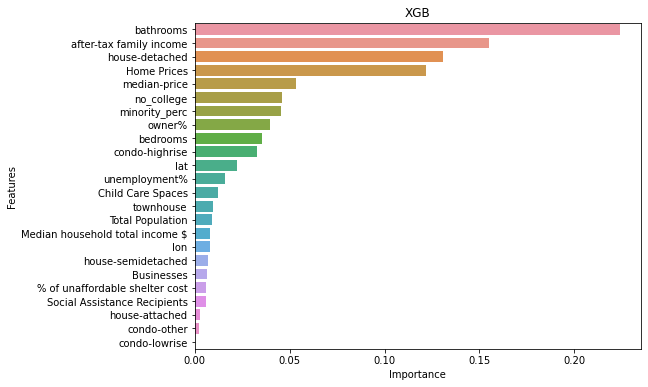

In [ ]:
# feature importance
importance_xgb = xgb_reg.feature_importances_
#summarize feat ure importance

features_xgb = pd.DataFrame({'Features': features, 'Importance': importance_xgb})
features_xgb.sort_values(by="Importance", axis=0, ascending=False, inplace=True)
plt.figure(figsize=[8,6])
sns.barplot(y="Features",x="Importance",data=features_xgb, orient='h')
plt.title('XGB')
plt.show()

In [ ]:
scores=pd.DataFrame()
#add linear regression scores to df scores
scores.loc[0, "Linear Regression"] = lin_mse_mean
scores.loc[1, "Linear Regression"] = lin_mse_std
scores.loc[2, "Linear Regression"] = lin_r2_mean
scores.loc[3, "Linear Regression"] = lin_r2_std

#Random Forest scores
scores.loc[0, "Random Forest"] = forest_mse_mean
scores.loc[1, "Random Forest"] = forest_mse_std
scores.loc[2, "Random Forest"] = forest_r2_mean
scores.loc[3, "Random Forest"] = forest_r2_std

#Decision Tree
scores.loc[0, "Decision Tree"] = tree_mse_mean
scores.loc[1, "Decision Tree"] = tree_mse_std
scores.loc[2, "Decision Tree"] = tree_r2_mean
scores.loc[3, "Decision Tree"] = tree_r2_std

#SVM
scores.loc[0, "SVR"] = svm_mse_mean
scores.loc[1, "SVR"] = svm_mse_std
scores.loc[2, "SVR"] = svm_r2_mean
scores.loc[3, "SVR"] = svm_r2_std

#KNN
scores.loc[0, "KNN"] = neigh_rmse_mean
scores.loc[1, "KNN"] = neigh_rmse_std
scores.loc[2, "KNN"] = neigh_r2_mean
scores.loc[3, "KNN"] = neigh_r2_std

#xgb
scores.loc[0, "XGB"] = xgb_rmse_mean
scores.loc[1, "XGB"] = xgb_rmse_std
scores.loc[2, "XGB"] = xgb_r2_mean
scores.loc[3, "XGB"] = xgb_r2_std


In [ ]:
score_tranposed = scores.T
score_tranposed.columns=['RMSE','RMSE std','R2','R2 std']
score_tranposed

,RMSE,RMSE std,R2,R2 std
Linear Regression,447168.682014,59.782408,0.703142,0.067764
Random Forest,393289.642025,54.428178,0.763377,0.080753
Decision Tree,511281.972024,64.044730,0.597100,0.147180
SVR,863966.719912,85.865672,-0.075714,0.031508
KNN,863966.719912,85.865672,0.605701,0.110976
XGB,367723.751209,70.955581,0.790384,0.083599


Fine- tune the model


*   Random Search




In [ ]:
# from sklearn.model_selection import cross_val_score
# model_list = [lin_reg, forest_reg]
# for m in model_list:
#   scores = cross_val_score(m,X,y, scoring='neg_mean_squared_error', cv=10)
#   print(f'{m} root_mean_quared_error is {np.sqrt(-scores)}')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=28),
    }


rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rnd_search.best_params_

{'max_features': 21, 'n_estimators': 100}

In [ ]:
cvrnd = rnd_search.cv_results_
for mean_score, params in zip(cvrnd["mean_test_score"], cvrnd["params"]):
    print(np.sqrt(-mean_score), params)

407169.31345022377 {'max_features': 7, 'n_estimators': 180}
386290.70066058286 {'max_features': 15, 'n_estimators': 107}
407151.14204654976 {'max_features': 8, 'n_estimators': 189}
380557.93911810906 {'max_features': 21, 'n_estimators': 103}
nan {'max_features': 26, 'n_estimators': 75}
390730.3023967618 {'max_features': 11, 'n_estimators': 88}
380114.8119642702 {'max_features': 21, 'n_estimators': 100}
409598.09462163696 {'max_features': 8, 'n_estimators': 152}
446687.57969854365 {'max_features': 3, 'n_estimators': 150}
443219.7439371753 {'max_features': 21, 'n_estimators': 2}


In [ ]:
forest_reg_tuned =rnd_search.best_estimator_
# forest_reg_tuned = RandomForestRegressor(grid_search.best_estimator_)

forest_reg_tuned.fit(X, y)

#cv get negative mean squared error
forest_scores_tuned = cross_val_score(forest_reg_tuned,X,y, scoring='neg_mean_squared_error', cv=10)
forest_scores_root_tuned = np.sqrt(-forest_scores_tuned)
forest_mse_mean_tuned = forest_scores_root_tuned.mean()
forest_mse_std_tuned = np.sqrt(forest_scores_root_tuned).std()
print('Random Forest_tuned')
print(f'Root_mean_squared-error {forest_mse_mean_tuned} with std of {forest_mse_std_tuned}')

#cv get r2 score
forest_r2_score_tuned = cross_val_score(forest_reg_tuned,X,y, scoring='r2', cv=10)
forest_r2_mean_tuned=forest_r2_score_tuned.mean()
forest_r2_std_tuned = forest_r2_score_tuned.std()
print(f'R2 score is {forest_r2_mean_tuned} with std of {forest_r2_std_tuned}')

Random Forest_tuned
Root_mean_squared-error 388050.3977497809 with std of 57.610897908621745
R2 score is 0.7715602264538034 with std of 0.07573430683102171


In [ ]:
#apply model on test data set
X_test = strat_test_set.drop('sold-price', axis=1)
y_test = strat_test_set['sold-price'].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = forest_reg_tuned.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,730.2
final_rmse



341631.7438060629

In [ ]:
#compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
ci_forest=np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
ci_forest

array([272419.35326544, 399014.02571637])

XGBoosting Hyperparameter tunning


In [ ]:
xgb_search = RandomizedSearchCV(xgb_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=42, reg...
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_features': <scipy.stats._d

In [ ]:
xgb_reg_tuned =xgb_search.best_estimator_
xgb_reg_tuned.fit(X,y)

#cv get negative mean squared error
xgb_tuned_scores = cross_val_score(xgb_reg_tuned,X,y, scoring='neg_mean_squared_error', cv=10)
xgb_tuned_scores_root = np.sqrt(-xgb_tuned_scores)
xgb_tuned_rmse_mean = xgb_tuned_scores_root.mean()
xgb_tuned_rmse_std = np.sqrt(xgb_tuned_scores_root).std()
print('XGB tunned')
print(f'Root_mean_squared-error {xgb_tuned_rmse_mean} with std of {xgb_tuned_rmse_std}')

#cv get r2
xgb_r2_tuned_scores = cross_val_score(xgb_reg_tuned,X,y, scoring='r2', cv=10)
xgb_r2_tuned_mean = xgb_r2_tuned_scores.mean()

print('XGB tunned r2')
xgb_r2_tuned_std = xgb_r2_tuned_scores.std()
print(f'Root_mean_squared-error {xgb_r2_tuned_mean} with std of {xgb_r2_tuned_std}')

XGB tunned
Root_mean_squared-error 367263.68081154115 with std of 65.50914305468226
XGB tunned r2
Root_mean_squared-error 0.789859580122628 with std of 0.08127509343441776


In [ ]:
#tunned xgb on test data
final_xgb_predictions = xgb_reg_tuned.predict(X_test_prepared)

final_xgb_mse = mean_squared_error(y_test, final_xgb_predictions)
final_xgb_rmse = np.sqrt(final_xgb_mse)   
final_xgb_rmse

324247.99201351864

In [ ]:
#compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors_xgb = (final_xgb_predictions - y_test) ** 2
ci_xgb=np.sqrt(stats.t.interval(confidence, len(squared_errors_xgb) - 1,
                         loc=squared_errors_xgb.mean(),
                         scale=stats.sem(squared_errors_xgb)))
ci_xgb

array([241309.7912361 , 389927.05125855])

In [ ]:
tuned_score = pd.DataFrame()
#Random Forest scores
tuned_score.loc[0, "Random Forest"] = forest_mse_mean #original score on train
tuned_score.loc[1, "Random Forest"] = forest_r2_mean #original score on train data
tuned_score.loc[2, "Random Forest"] = forest_mse_mean_tuned#tuned model score on train dataset
tuned_score.loc[3, "Random Forest"] = forest_r2_mean_tuned #tuned model score on train dataset
tuned_score.loc[4, "Random Forest"] = final_rmse#tuned score on testdataset
# tuned_score.loc[5, "Random Forest"] = ci_forest #testdataset confidence interval
#xgb
tuned_score.loc[0, "XGB"] = xgb_rmse_mean
tuned_score.loc[1, "XGB"] = xgb_r2_mean
tuned_score.loc[2, "XGB"] = xgb_tuned_rmse_mean
tuned_score.loc[3, "XGB"] = xgb_r2_tuned_mean
tuned_score.loc[4, "XGB"] = final_xgb_rmse
# tuned_score.loc[0, "XGB"] = ci_xgb


In [ ]:
tuned_score_transposed = tuned_score.T
tuned_score_transposed.columns =['Original RMSE', 'Origianl R2', 'Tuned RMSE', 'Tuned R2', 'Tuned RMSE on test data']
tuned_score_transposed

,Original RMSE,Origianl R2,Tuned RMSE,Tuned R2,Tuned RMSE on test data
Random Forest,393289.642025,0.763377,388050.397750,0.77156,341631.743806
XGB,367723.751209,0.790384,367263.680812,0.78986,324247.992014
